In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import mode
import matplotlib.pyplot as plt

# PARTE 1:
Variando el k entre 1 y 15, ejecutar el algoritmo y obtener su tasa de aciertos para el conjunto de
test. Representar este valor en un diagrama de barras, calcular el k óptimo y dar su correspondiente
tasa de aciertos.

In [2]:
digitos = load_digits()
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
len(digitos.feature_names)

64

<b>La primera línea del código </b> define el DataFrame utilizando la función pd.DataFrame(), donde columns=digitos.feature_names indica que los nombres de columna del DataFrame serán los nombres de las características de los dígitos. data=digitos.data indica que los datos de los dígitos se utilizarán para llenar las filas del DataFrame.

<b>La segunda línea del código </b> inserta una nueva columna en el DataFrame llamada 'digito' en la última posición (ubicada en el índice len(digitos.feature_names)). El valor de cada celda en esta columna corresponde a la clase o etiqueta asociada con cada imagen de dígito en el conjunto de datos. El valor de la etiqueta se toma de digitos.target.

In [18]:
df = pd.DataFrame(columns=digitos.feature_names, data=digitos.data)
df.insert(loc=len(digitos.feature_names), column='digito', value=digitos.target)


In [19]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digito
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


Vamos a escalar los datos de entrada en un intervalo entre 0 y 1, utilizando la función 'MinMaxScaler()' del módulo 'sklearn.preprocessing' de Scikit-Learn.

La <b>primera línea</b> del código crea un objeto de 'MinMaxScaler()', que se utilizará para escalar los datos de entrada.

La <b>segunda línea</b> del código aplica la transformación a los datos de entrada utilizando el método 'fit_transform()' del objeto 'MinMaxScaler()'. Esto escala los datos de entrada de forma que los valores más bajos se convierten en 0, los valores más altos se convierten en 1 y los valores intermedios se escalan linealmente entre estos dos extremos.

La <b>tercera línea</b> del código define la variable 'y' que almacena las etiquetas o clases asociadas con cada imagen de dígito en el conjunto de datos. Estas etiquetas se toman directamente del conjunto de datos de entrada ('digitos.target').

In [10]:
escala = MinMaxScaler()  # transformamos a intervalo (0,1)

X = escala.fit_transform(digitos.data)
y = digitos.target

In [11]:
import warnings
warnings.filterwarnings("ignore")


Este código realiza la validación cruzada utilizando el método k-vecinos más cercanos (KNN) en un conjunto de datos de dígitos escritos a mano.

La <b>primera línea</b> del código crea una matriz de ceros de tamaño (10, 15) y tipo de datos flotante, que se utilizará para almacenar las puntuaciones de precisión de KNN para cada iteración de validación cruzada.

El código utiliza <b>un bucle</b> for para realizar 10 iteraciones de validación cruzada, donde en cada iteración, el conjunto de datos se divide en conjuntos de entrenamiento y prueba utilizando el método "resorte holdout" con una proporción de 1/3 para el conjunto de prueba.

El <b>segundo bucle</b> for realiza KNN en cada iteración utilizando el número de vecinos "k" desde 1 hasta 15.

Dentro del <b>segundo bucle</b>, se crea un objeto 'KNeighborsClassifier' de Scikit-Learn, donde se establece el número de vecinos 'n_neighbors' en el valor de 'k', y se utiliza el algoritmo 'brute' para encontrar los vecinos más cercanos.

A continuación, se ajusta el clasificador KNN utilizando los datos de entrenamiento ('X_train' e 'y_train') utilizando el método 'fit()'. Luego, se evalúa la precisión del modelo KNN en los datos de prueba ('X_test' e 'y_test') utilizando el método 'score()' y se almacena la precisión en la matriz de precisión 'accuracy'.

In [12]:
accuracy = np.zeros((10, 15), dtype=float)
for h in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3 , stratify=y) #metodo de resorte holdout
    for k in range(1,16): #metodo k vecinos desde 1 hasta 15
        clf = KNeighborsClassifier(n_neighbors = k , algorithm='brute')
        clf.fit(X_train, y_train)
        accuracy[h,k-1] = clf.score(X_test,y_test)



In [14]:
aciertos= np.mean(accuracy, axis=0)
aciertos


array([0.98647746, 0.98480801, 0.98664441, 0.9836394 , 0.98414023,
       0.98230384, 0.98247078, 0.98046745, 0.98080134, 0.97846411,
       0.97829716, 0.97562604, 0.97712855, 0.97445743, 0.97429048])

In [10]:
aciertos.shape


(15,)

La <b>primera línea</b> del código crea una figura utilizando el método 'subplots()' de Matplotlib y establece el tamaño de la figura en (10,5).

La <b>segunda línea</b> del código utiliza el método 'bar()' de Matplotlib para crear el diagrama de barras. El eje x de las barras se establece en 'np.arange(1, 16)', que es un arreglo que contiene los valores de k desde 1 hasta 15. El eje y de las barras se establece en 'height=aciertos', donde 'aciertos' es una lista que contiene la precisión del modelo KNN para cada valor de k.

La <b>tercera línea</b> del código utiliza el método 'set_ylim()' de Matplotlib para establecer los límites del eje y en el intervalo de 0.85 a 0.99.

La <b>cuarta línea</b> del código utiliza el método 'set_title()' de Matplotlib para establecer el título del diagrama de barras en "DataSet: DIGITS (1797)".

La <b>quinta línea</b> del código utiliza el método 'set_xlabel()' de Matplotlib para establecer la etiqueta del eje x del diagrama de barras en "K - vecinos".

La <b>sexta línea</b> del código utiliza el método 'set_ylabel()' de Matplotlib para establecer la etiqueta del eje y del diagrama de barras en "Aciertos".

En resumen, este código genera un diagrama de barras que muestra la precisión del modelo KNN para diferentes valores de K en un conjunto de datos de dígitos escritos a mano. El diagrama de barras se personaliza para incluir títulos y etiquetas de ejes adecuados.

Text(0, 0.5, 'Aciertos')

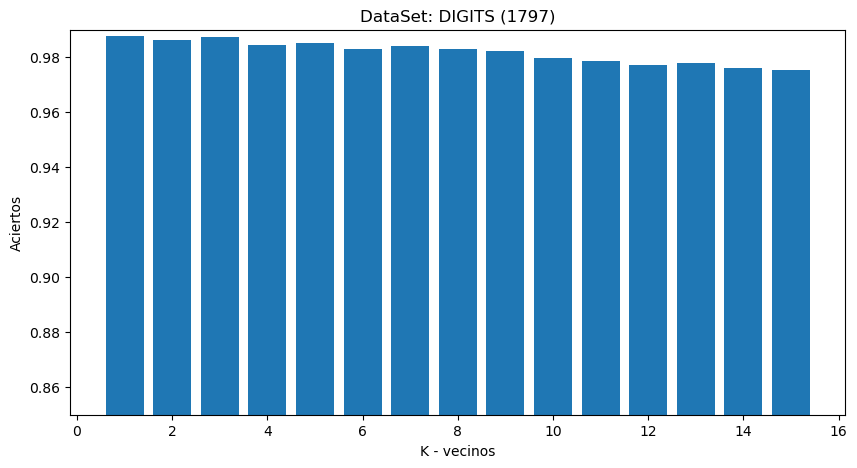

In [11]:
fig, ax =plt.subplots(figsize=(10,5))  # represenatcion diagrama de barras
ax.bar(x=np.arange(1, 16), height=aciertos)
ax.set_ylim(0.85,0.99)
ax.set_title('DataSet: DIGITS (1797)')
ax.set_xlabel('K - vecinos')
ax.set_ylabel('Aciertos')

In [12]:
print('Kmax  = ', np.argmax(accuracy)+1, '\tTasa max = ',np.max(accuracy))  #k-optimo y su tasa de aciertosç

Kmax  =  18 	Tasa max =  0.996661101836394


# PARTE 2:
Lo mismo que lo anterior, sólo que los píxeles hay que reducirlos a bits, esto es, poner uno si el
pixel no era cero y dejar el cero, si ya lo era. 

Este código realiza una operación booleana en la matriz 'digitos.data' para transformar los valores no nulos en 1 y los valores nulos en 0.

La expresión 'digitos.data != 0' devuelve una matriz booleana del mismo tamaño que 'digitos.data', donde cada elemento de la matriz se establece en 'True' si el valor correspondiente en 'digitos.data' es diferente de 0, y se establece en 'False' si el valor correspondiente en 'digitos.data' es igual a 0.

Por lo tanto, la operación 'digitos.data != 0' transforma la matriz 'digitos.data' en una matriz de 1s y 0s, donde los valores diferentes de 0 se transforman en 1 y los valores iguales a 0 se transforman en 0.

In [13]:
digitos.data != 0  #transformar a 1 o 0

array([[False, False,  True, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True,  True, False],
       ...,
       [False, False,  True, ...,  True, False, False],
       [False, False,  True, ...,  True, False, False],
       [False, False,  True, ...,  True,  True, False]])

Este código ajusta un modelo KNN a un conjunto de datos de dígitos escritos a mano después de haber transformado los datos para que los valores no nulos se conviertan en 1 y los valores nulos en 0.

La <b>primera línea</b> del código crea una matriz de 'X' que tiene la misma forma que 'digitos.data', pero se convierte en una matriz booleana que contiene valores de 1 para cada posición en 'digitos.data' que no sea cero y valores de 0 en cualquier otra posición.

La <b>segunda línea</b> del código crea una matriz de 'accuracy' de tamaño (10, 15) y tipo de datos flotante para almacenar los resultados de precisión.

El resto del código es un bucle que itera 10 veces. En cada iteración, se divide aleatoriamente el conjunto de datos en conjuntos de entrenamiento y prueba utilizando el método de resorte holdout. Luego, se ajusta el modelo KNN utilizando el algoritmo "brute" para cada valor de k de 1 a 15, y se almacena la precisión del modelo en la matriz 'accuracy' correspondiente al número de iteración y al valor de k.

En resumen, este código transforma el conjunto de datos para que los valores no nulos se conviertan en 1 y los valores nulos en 0, y luego ajusta un modelo KNN utilizando el algoritmo "brute" para diferentes valores de k. La precisión del modelo se almacena en una matriz y se utiliza para evaluar el rendimiento del modelo para diferentes valores de k.

In [15]:
X = np.array(digitos.data != 0, dtype=float) 
X

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [15]:
accuracy = np.zeros((10, 15), dtype=float)
for h in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y)
    for k in range (1, 16):
        clf = KNeighborsClassifier(n_neighbors = k , algorithm='brute')
        clf.fit(X_train, y_train)
        accuracy[h,k-1] = clf.score(X_test,y_test)

In [16]:
aciertos= np.mean(accuracy, axis=0)
aciertos.shape

(15,)

La <b>primera línea</b> del código crea una figura y un objeto de eje (ax) usando la función subplots() de la biblioteca matplotlib.pyplot.

La <b>segunda línea</b> traza un gráfico de barras utilizando la función bar() de ax, donde el eje x es un array NumPy de números enteros del 1 al 15 (utilizando np.arange(1,16)), y la altura de cada barra es la precisión del modelo para cada valor de k, almacenada en la matriz aciertos.

La <b>tercera línea</b> establece los límites del eje y utilizando la función set_ylim() de ax, donde el límite inferior es 0.85 y el límite superior es 0.99.

La <b>cuarta línea</b> establece el título del gráfico utilizando la función set_title() de ax, con el texto "DataSet: DIGITS (1797)".

La <b>quinta línea</b> establece la etiqueta del eje x utilizando la función set_xlabel() de ax, con el texto "K - vecinos".

La <b>sexta línea</b> establece la etiqueta del eje y utilizando la función set_ylabel() de ax, con el texto "Aciertos".

Finalmente, la última línea del código cierra el gráfico y muestra la visualización.

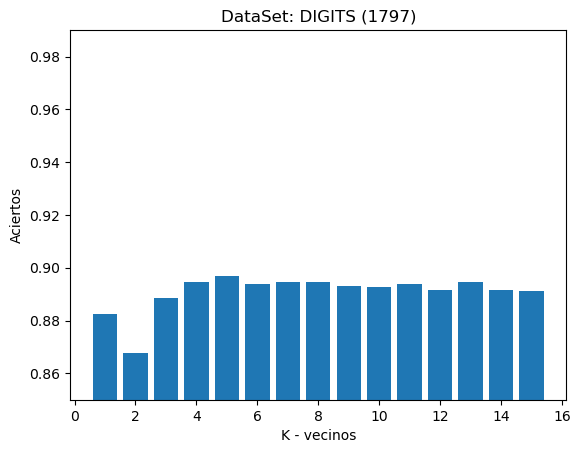

In [17]:
fig, ax = plt.subplots()
ax.bar(x=np.arange(1,16),height=aciertos)
ax.set_ylim(0.85,0.99)
ax.set_title('DataSet: DIGITS (1797)')
ax.set_xlabel('K - vecinos')
ax.set_ylabel('Aciertos');

In [18]:
print('Kmax = ',np.argmax(accuracy)+1, '\tTasa max = ', np.max(accuracy))

Kmax =  28 	Tasa max =  0.9232053422370617


In [19]:
print(digitos.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo